# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [ ]:
# Supress Warnings
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
# Import the numpy and pandas package
import pandas as pd
import numpy as np

In [ ]:
# Read the given CSV file, and view some sample records
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Let's inspect the various aspects of our dataframe

In [ ]:
#shape
advertising.shape

(200, 4)

In [ ]:
#info
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
#describe
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Step 2: Visualising the Data

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `Sales`.

In [ ]:
#Visualising the Data import needed libraries and use pairplot
#sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',size=4, aspect=1, kind='scatter')
#sns.heatmap

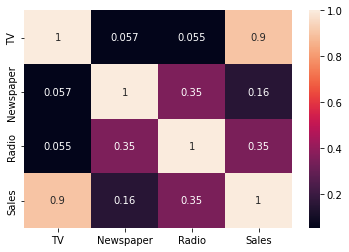

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(advertising[["TV","Newspaper", "Radio","Sales"]].corr(),annot = True)
plt.show()

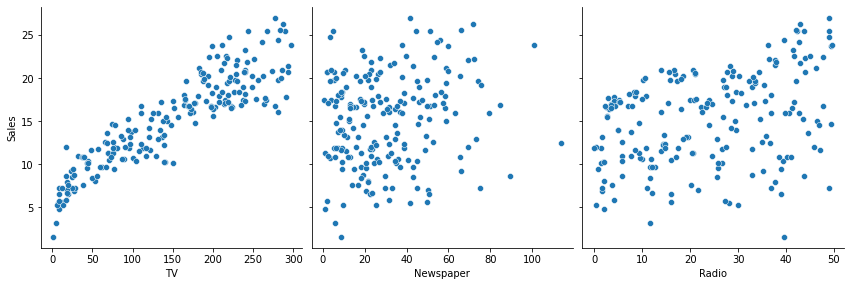

In [ ]:
sns.pairplot(advertising, x_vars = ["TV", "Newspaper", "Radio"], y_vars = "Sales", size=4, aspect=1, kind="scatter")
plt.show()


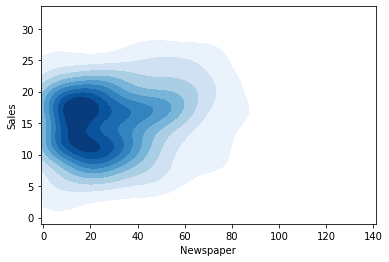

In [ ]:
sns.kdeplot(advertising.Newspaper, advertising.Sales, cmap='Blues',shade=True, shade_lowest=False, clip=(-1,300))
plt.show()

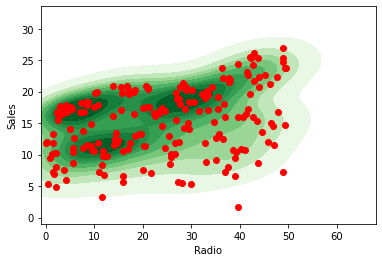

In [ ]:
sns.kdeplot(advertising.Radio, advertising.Sales, cmap='Greens',shade=True, shade_lowest=False, clip=(-1,300))
plt.scatter(advertising.Radio, advertising.Sales, color='Red')

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [ ]:
X = advertising['TV']
y = advertising['Sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
# Let's now take a look at the train dataset

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [ ]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

### Linear Regression using `linear_model` in `sklearn`

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we have already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [ ]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
X_train_lm.shape

(140,)

In [ ]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [ ]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [ ]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()
# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [ ]:
print(lm.intercept_)
print(lm.coef_)

6.948683200001357
[0.05454575]


In [ ]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
x=np.array([230,17])
y=x.reshape(-1,1)
y_pred = lm.predict(y)
y_pred

array([19.49420637,  7.875961  ])

In [ ]:
y_pred_test = lm.predict(X_test_lm)

In [ ]:
y_test = np.array(y_test_lm)
y1 = y_test.reshape(-1,1)

The equationwe get is the same as what we got before!

$ Sales = 6.948 + 0.054* TV $

Sklearn linear model is useful as it is compatible with a lot of sklearn utilites (cross validation, grid search etc.)

In [ ]:
# predict values of sales based on test data,compare the actual value and the predicted value
y_pred = np.array(y_pred_test)
yp = y_pred.reshape(-1,1)
result = np.hstack((y1,yp))
df1 = pd.DataFrame(result,columns=["Test_Result","Y_pred"])
print(df1)

    Test_Result     Y_pred
0           6.6   7.374140
1          20.7  19.941482
2          17.2  14.323269
3          19.4  18.823294
4          21.8  20.132392
5          17.2  18.228745
6          12.2  14.541452
7          16.7  17.726924
8          22.6  18.752384
9          22.3  18.774202
10         11.9  13.341445
11         19.7  19.466933
12          8.7  10.014155
13         20.6  17.192376
14         10.6  11.705073
15         14.0  12.086893
16         17.3  15.114182
17         16.7  16.232370
18         18.0  15.866914
19         11.9  13.106899
20         17.4  18.659656
21         11.0  14.006904
22         22.4  17.606923
23         17.1  16.603281
24         20.5  17.034193
25         24.7  18.965113
26         19.6  18.937840
27         11.3  11.055978
28         20.7  17.034193
29         15.2  13.663265
30         13.6  10.679613
31         11.3  10.712340
32         11.6  13.548719
33         19.9  17.225103
34          8.4   9.675971
35         14.2  13.521446
3

In [ ]:
# repeat the process after scaling and compare the results